<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day28_RNN%EA%B3%BC_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 28번째 이야기
- 순환신경망 RNN과 GRU

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data 구성
# 모델
# 학습
# 평가

In [ ]:
# 데이터 생성
def generate_data(seq_length = 1000):
  time_steps = np.linspace(0, np.pi*8, seq_length)
  data = np.sin(time_steps)
  data = data.reshape(-1,1)
  return torch.tensor(data, dtype=torch.float32)

In [ ]:
dataset = generate_data()

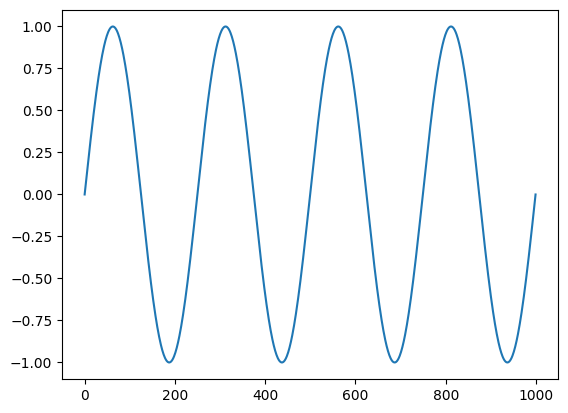

In [ ]:
plt.plot(dataset)

In [ ]:
# RNN / GRU Model
class TwoModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers, rnn_type="RNN"):
    super().__init__()
    self.hidden_size=hidden_size
    self.num_layers = num_layers

    if rnn_type == 'RNN':
      self.rnn = nn.RNN(input_size, hidden_size, num_layers)
    elif rnn_type == 'GRU':
      self.rnn = nn.GRU(input_size, hidden_size, num_layers)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x, hidden):
    out, hidden = self.rnn(x, hidden)
    out = self.fc(out)
    return out, hidden

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super().__init__()
      self.hidden_size=hidden_size
      self.num_layers = num_layers      
      self.rnn = nn.RNN(input_size, hidden_size, num_layers) # RNN      
      self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
      out, hidden = self.rnn(x, hidden)
      out = self.fc(out)
      return out, hidden
class GRUModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
      super().__init__()
      self.hidden_size=hidden_size
      self.num_layers = num_layers      
      self.rnn = nn.GRU(input_size, hidden_size, num_layers) # GRU      
      self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x, hidden):
      out, hidden = self.rnn(x, hidden)
      out = self.fc(out)
      return out, hidden

In [ ]:
# hyper parameters
input_size = 1
hidden_size = 32
output_size = 1
num_layers = 3
# RNN
learning_rate = 1e-3
num_epochs = 100

In [ ]:
# dataset 구성
dataset = generate_data()
train_data = dataset[:-200] # train data 800
test_data = dataset[-200:]

In [ ]:
model = RNNModel(input_size, hidden_size,output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_data[0]

tensor([0.])

In [ ]:
from tqdm.auto import tqdm
for epoch in tqdm(range(num_epochs)):
  hidden = torch.zeros(num_layers, 1, hidden_size)
  for i in range(train_data.shape[0]):  
    x = train_data[i:i+1].unsqueeze(0) #X
    y = train_data[i+1:i+2].unsqueeze(0) #label

    output, hidden = model(x, hidden)
    hidden = hidden.detach()

    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # with torch.no_grad() # 임시로 학습 모드 정지
# Test

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 0, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


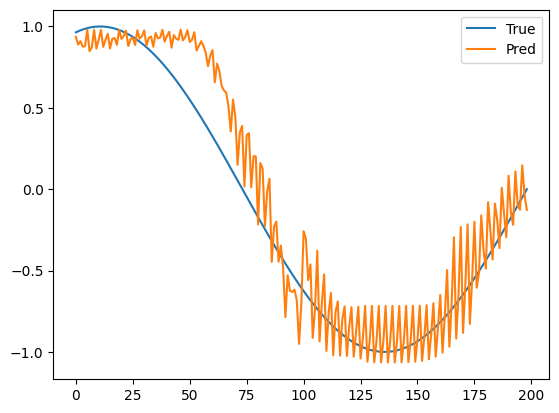

In [ ]:
model.eval()
predicted = []
losses = []
hidden = torch.zeros(num_layers, 1, hidden_size)
for i in range(test_data.shape[0]-1):
  x = test_data[i:i+1].unsqueeze(0)
  output, hidden = model(x, hidden)
  predicted.append(output.item())

# 결과 시각화
plt.plot(test_data[1:].numpy(), label='True')
plt.plot(np.array(predicted), label='Pred')
plt.legend()
plt.show();

  0%|          | 0/100 [00:00<?, ?it/s]

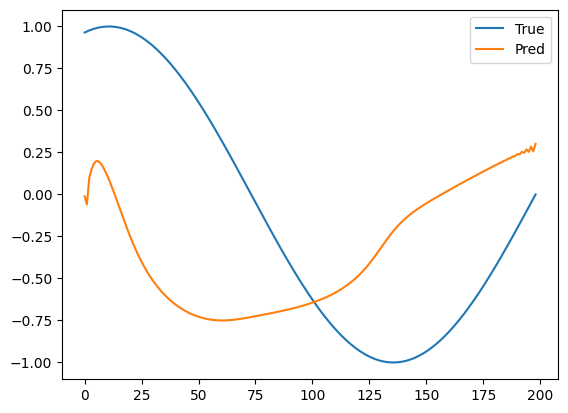

In [ ]:
model = GRUModel(input_size, hidden_size,output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
from tqdm.auto import tqdm
for epoch in tqdm(range(num_epochs)):
  hidden = torch.zeros(num_layers, 1, hidden_size)
  for i in range(train_data.shape[0]):  
    x = train_data[i:i+1].unsqueeze(0) #X
    y = train_data[i+1:i+2].unsqueeze(0) #label

    output, hidden = model(x, hidden)
    hidden = hidden.detach()

    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # with torch.no_grad() # 임시로 학습 모드 정지
# Test
model.eval()
predicted = []
hidden = torch.zeros(num_layers, 1, hidden_size)
for i in range(test_data.shape[0]-1):
  x = test_data[i:i+1].unsqueeze(0)
  output, hidden = model(x, hidden)
  predicted.append(output.item())

# 결과 시각화
plt.plot(test_data[1:].numpy(), label='True')
plt.plot(np.array(predicted), label='Pred')
plt.legend()
plt.show();

In [ ]:
img = (np.ones((300,200,3))*100).astype(np.uint8)
img[-100:]=200

In [ ]:
img[-100:,:,0]=150

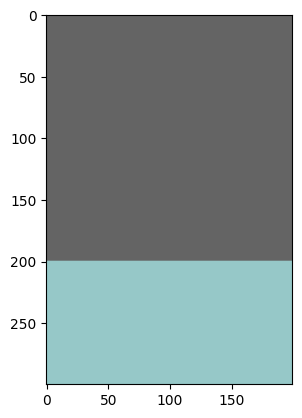

In [ ]:
plt.imshow(img)

In [ ]:
dataset = [img]*10
dataset[0]

array([[[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[150, 200, 200],
        [150, 200, 200],
        [150, 200, 200],
        ...,
        [150, 200, 200],
        [150, 200, 200],
        [150, 200, 200]],

       [[150, 200, 200],
        [150, 200, 200],
        [150, 200, 200],
        ...,
        [150, 200, 200],
        [150, 200, 200],
        [150, 200, 200]],

       [[150, 200, 200],
        [150, 200, 200],
        [150, 200, 200],
        ...,
        [150, 200, 200],
        [150, 200, 200],
        [150, 200, 200]]

In [ ]:
dataset[0]

In [ ]:
train_arr = np.array(img)

In [ ]:
dataset = [
    (img, 1)
]

In [ ]:
new_dataset = [ (torch.tensor(img, dtype=torch.float32),torch.tensor(label, dtype=torch.float32)  ) for im, label in dataset  ]

In [ ]:
d = np.array(dataset, dtype=np.float32)

In [ ]:
new_dataset

[(tensor([[[100., 100., 100.],
           [100., 100., 100.],
           [100., 100., 100.],
           ...,
           [100., 100., 100.],
           [100., 100., 100.],
           [100., 100., 100.]],
  
          [[100., 100., 100.],
           [100., 100., 100.],
           [100., 100., 100.],
           ...,
           [100., 100., 100.],
           [100., 100., 100.],
           [100., 100., 100.]],
  
          [[100., 100., 100.],
           [100., 100., 100.],
           [100., 100., 100.],
           ...,
           [100., 100., 100.],
           [100., 100., 100.],
           [100., 100., 100.]],
  
          ...,
  
          [[150., 200., 200.],
           [150., 200., 200.],
           [150., 200., 200.],
           ...,
           [150., 200., 200.],
           [150., 200., 200.],
           [150., 200., 200.]],
  
          [[150., 200., 200.],
           [150., 200., 200.],
           [150., 200., 200.],
           ...,
           [150., 200., 200.],
           [150., 

In [ ]:
from torchvision import datasets

In [ ]:
dataset = datasets.FashionMNIST(root='./data',download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 17168109.02it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302527.56it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5359559.54it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16053737.54it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
img = dataset.data[0]

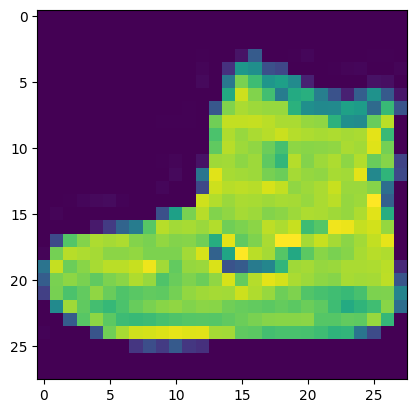

In [ ]:
plt.imshow(img)

In [ ]:
gray_img = np.ones((200, 300), dtype=np.uint8)*150

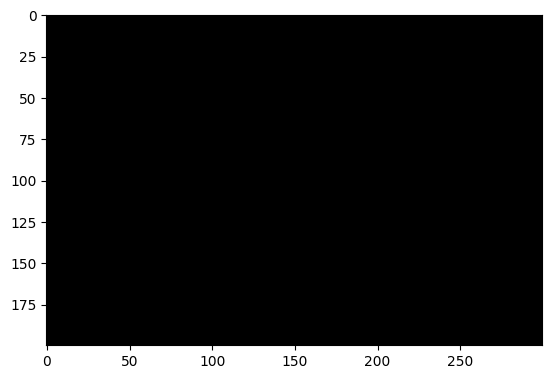

In [ ]:
plt.imshow(gray_img, cmap='gray')

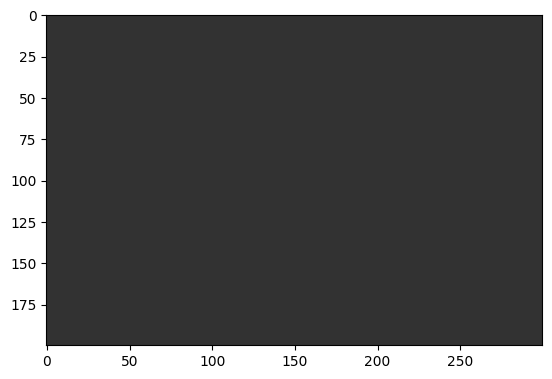

In [ ]:
gray_img = np.ones((200, 300, 3), dtype=np.uint8)*50
plt.imshow(gray_img, cmap='gray')

In [ ]:
gray_img

array([[[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       ...,

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]]], dtype=uint8)

In [ ]:
# img_data shape (배치사이즈, 채널, 세로, 가로)

In [ ]:
(128, 28, 28) # squeeze 차원 줄이기, un~ 차원 늘리기기

In [ ]:
img.shape

torch.Size([28, 28])

In [ ]:
tmp = img.unsqueeze(1)
tmp.shape

torch.Size([28, 1, 28])

In [ ]:
train_data=[
    ("img", "label"),
]

In [ ]:
for x,y in zip(train_data):
  print(x,y)

img label
